In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [10]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_data = scaler.transform(df)

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
x_pca = pca.transform(scaled_data)

In [20]:
scaled_data.shape

(569, 30)

In [21]:
x_pca.shape

(569, 2)

Text(0.5,0,'Second Principle Component')

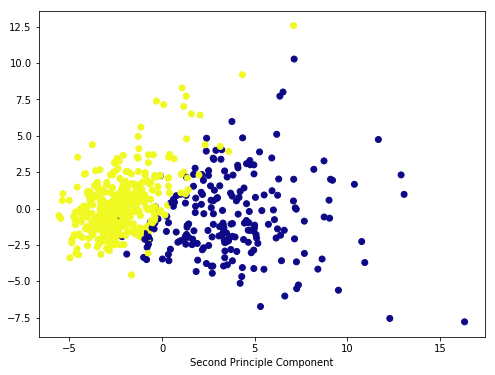

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principle Component')
plt.xlabel('Second Principle Component')

In [24]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [25]:
df_com = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

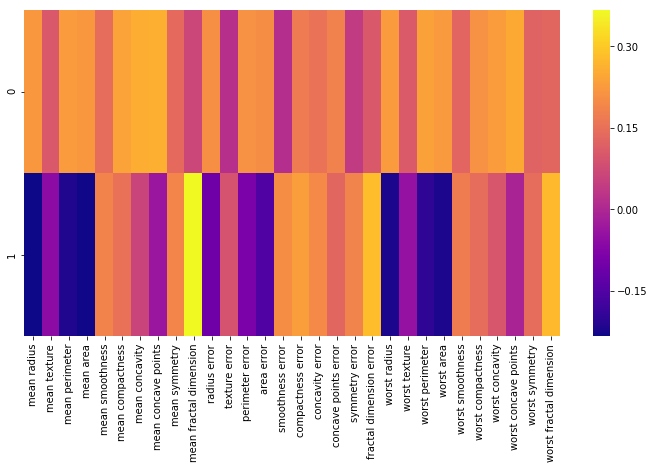

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(df_com,cmap='plasma',)

In [29]:
read =pd.read_csv('bill_authentication.csv')

In [30]:
read

,Variance,Skewness,Curtosis,Entropy,Class
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


In [43]:
features =['Variance','Skewness','Curtosis','Entropy']
x=read[features]
y=read['Class']

In [44]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
scaled_data = scaler.transform(x)

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)

In [48]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
x_pca = pca.transform(scaled_data)

In [50]:
scaled_data.shape

(1372, 4)

In [51]:
x_pca.shape

(1372, 2)

Text(0.5,0,'Second Principle Component')

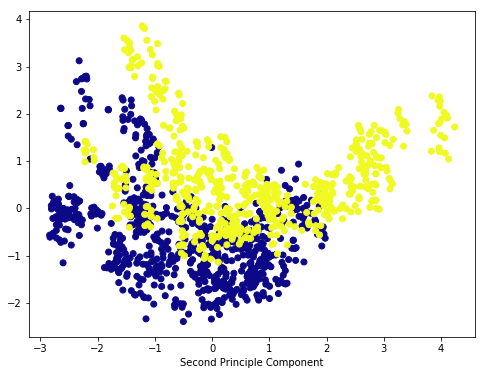

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=read['Class'],cmap='plasma')
plt.xlabel('First Principle Component')
plt.xlabel('Second Principle Component')

In [53]:
pca.components_

array([[-0.24877213, -0.6393234 ,  0.6127065 ,  0.39238854],
       [-0.75459093,  0.05034037,  0.1534594 , -0.6360099 ]])

In [54]:
df_com = pd.DataFrame(pca.components_,columns=['Variance','Skewness','Curtosis','Entropy'])

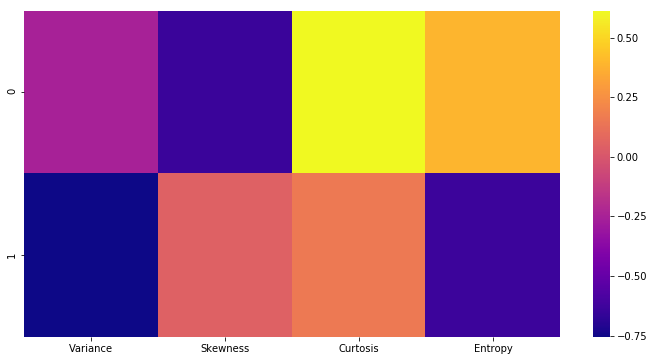

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(df_com,cmap='plasma',)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.2)

In [61]:
svclassifier = SVC(kernel='linear')
clf = svclassifier.fit(x_train, y_train)

In [62]:
y_pred = svclassifier.predict(x_test)

In [63]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[126  23]
 [ 33  93]]
             precision    recall  f1-score   support

          0       0.79      0.85      0.82       149
          1       0.80      0.74      0.77       126

avg / total       0.80      0.80      0.80       275



In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

data = pd.read_csv('bill_authentication.csv')

features = ['Variance','Skewness','Curtosis','Entropy']
x=data[features]
y=data['Class']

scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)



x_train,x_test,y_train,y_test = train_test_split(scaled_data,y,test_size=0.2)

svclassifier = SVC(kernel='linear')
clf = svclassifier.fit(x_train,y_train)

y_pred = svclassifier.predict(x_test)


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[141   5]
 [  2 127]]
             precision    recall  f1-score   support

          0       0.99      0.97      0.98       146
          1       0.96      0.98      0.97       129

avg / total       0.97      0.97      0.97       275

